In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv('3.01.+Country+Clusters.csv')

In [11]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [6]:
#encode language var
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [10]:
x=data_mapped.iloc[:,3:4]

In [16]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [18]:
km=KMeans(3)

In [20]:
km.fit(x)

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
clu=km.fit_predict(x)
clu

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 0, 1, 0])

In [24]:
d_w_clu=data_mapped.copy()
d_w_clu['Cluster']=clu
d_w_clu

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


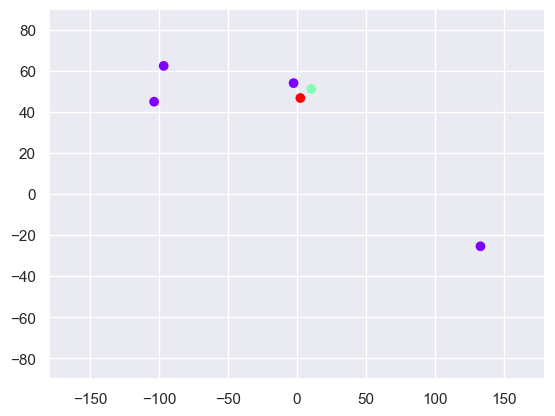

In [26]:
plt.scatter(d_w_clu['Longitude'],d_w_clu['Latitude'],c=d_w_clu['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [28]:
x=data_mapped.iloc[:,1:4]

In [30]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [32]:
km=KMeans(2)

In [34]:
km.fit(x)

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [36]:
clu=km.fit_predict(x)
clu

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0])

In [38]:
d_w_clu=data_mapped.copy()
d_w_clu['Cluster']=clu
d_w_clu

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


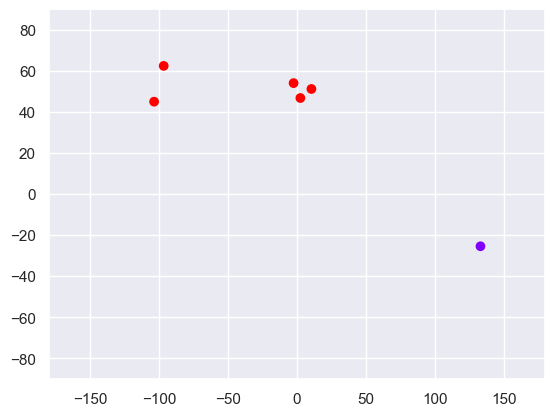

In [40]:
plt.scatter(d_w_clu['Longitude'],d_w_clu['Latitude'],c=d_w_clu['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [62]:
#Clusters are based on geographical location

In [42]:
#to get WCSS
km.inertia_

13208.958119999996

In [44]:
#calculate WCSS for each clusters
# Create an empty list
wcss=[]
# Create all possible cluster solutions with a loop
for i in range(1,7):
# Cluster solution with i clusters
    km=KMeans(i)
# Fit the data
    km.fit(x)
# Find WCSS for the current iteration
    wcss_iter=km.inertia_
# Append the value to the WCSS list

    wcss.append(wcss_iter)

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

In [46]:
#wcss of 1 clu, then 2 clu, until 6 clus. when each point is a seperate clus, WCSS=0
wcss

[42605.41356666667,
 17246.714500000002,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

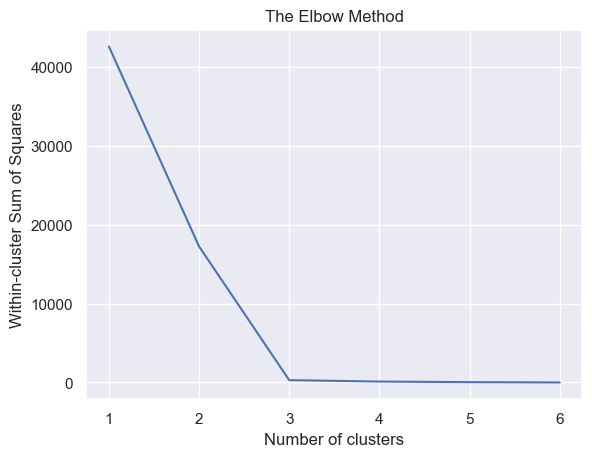

In [48]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
num_clus=range(1,7)
plt.plot(num_clus,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [76]:
# 2 clu solution is suboptimal. 3 is optimal no of clusters